In [0]:
from google.colab import files

In [0]:
uploaded = files.upload()

Saving Google_Stock_Price_Test.csv to Google_Stock_Price_Test.csv


## Importing Libraries

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import io
import numpy as np 

loading Train and Test Dataset 

In [0]:
train = pd.read_csv(io.BytesIO(uploaded['Google_Stock_Price_Train.csv']))

In [0]:
test = pd.read_csv(io.BytesIO(uploaded['Google_Stock_Price_Test.csv']))

In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
Date      1258 non-null object
Open      1258 non-null float64
High      1258 non-null float64
Low       1258 non-null float64
Close     1258 non-null object
Volume    1258 non-null object
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [0]:
train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [0]:
train_data = train.iloc[:,1:2].values

In [0]:
train_data.shape

(1258, 1)

Feature Scaling

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
sc = MinMaxScaler(feature_range=(0,1))

In [0]:
train_sc = sc.fit_transform(train_data)

In [0]:
train_sc

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

creating Timesteps 

In [0]:
x_train = []
y_train = [] 

In [0]:
for i in range(60,1258):
  x_train.append(train_sc[i-60:i,0])
  y_train.append(train_sc[i,0])
x_train,y_train = np.array(x_train),np.array(y_train)


In [0]:
x_train.shape

(1198, 60, 1)

In [0]:
#reshaping 
x_train = x_train.reshape((x_train.shape[0],x_train.shape[1],1))

In [0]:
x_train.shape

(1198, 60, 1)

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

Using TensorFlow backend.


RNN

In [0]:
#Intialising the RNN
regressor = Sequential()
#Adding the first LSTM layers-1
regressor.add(LSTM(units = 50, return_sequences= True, input_shape = (x_train.shape[1],1)))
regressor.add(Dropout(0.2))

#Adding the first LSTM layers-2
regressor.add(LSTM(units = 50, return_sequences= True))
regressor.add(Dropout(0.2))


#Adding the first LSTM layers-3
regressor.add(LSTM(units = 50, return_sequences= True))
regressor.add(Dropout(0.2))

#Adding the first LSTM layers-3
regressor.add(LSTM(units = 50 ))
regressor.add(Dropout(0.2))

#Adding the output layer 
regressor.add(Dense(1,))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
#compiling model
regressor.compile(optimizer='adam',loss=keras.losses.mean_squared_error)

In [0]:
#fitting the model
regressor.fit(x=x_train,y=y_train,epochs=150,batch_size=32)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/150





1198/1198 [==============================] - 24s 20ms/step - loss: 0.0579
Epoch 2/150
1198/1198 [==============================] - 17s 14ms/step - loss: 0.0060
Epoch 3/150
1198/1198 [==============================] - 16s 14ms/step - loss: 0.0049
Epoch 4/150
1198/1198 [==============================] - 16s 14ms/step - loss: 0.0050
Epoch 5/150
1198/1198 [==============================] - 17s 14ms/step - loss: 0.0051
Epoch 6/150
1198/1198 [==============================] - 16s 14ms/step - loss: 0.0046
Epoch 7/150
1198/1198 [==============================] - 16s 14ms/step - loss: 0.0044
Epoch 8/150
1198/1198 [==============================] - 16s 14ms/step - loss: 0.0054
Epoch 9/150
1198/1198 [==============================] - 16s 14ms/step - loss: 0.0045
Epoch 10/150
1198/1198 [==============================] - 16s 14ms/step - loss: 0.0042
Epoch 11/150
1198/1198 [=============

In [0]:
#Making predictions 
#test dataset
actual_stock_price = test.iloc[:,1:2].values

In [0]:
dataset_total = pd.concat((train['Open'],test['Open']),axis=0 )
inputs = dataset_total[len(dataset_total) - len(test) - 60:].values 
inputs = inputs.reshape(-1,1)
inputs_sc = sc.transform(inputs)

In [0]:
x_test = []
for i in range(60,80):
  x_test.append(inputs_sc[i-60:i,0])
x_test= np.array(x_test)

In [0]:
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [0]:
#Predictions 
predicted_stock_price = regressor.predict(x_test)

In [0]:
predicted_stock_price #scaled 

array([[0.95344913],
       [0.9489435 ],
       [0.9563863 ],
       [0.95825386],
       [0.96630657],
       [0.98055255],
       [0.9869584 ],
       [0.98521066],
       [0.9863496 ],
       [0.98815846],
       [0.98888135],
       [0.9882543 ],
       [0.9876723 ],
       [0.98954797],
       [0.99098825],
       [1.0059105 ],
       [1.0192392 ],
       [1.0305779 ],
       [1.0310211 ],
       [1.011598  ]], dtype=float32)

In [0]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [0]:
predicted_stock_price #unscaled

array([[791.65607],
       [789.2341 ],
       [793.235  ],
       [794.2389 ],
       [798.56775],
       [806.2258 ],
       [809.6693 ],
       [808.7298 ],
       [809.34204],
       [810.31445],
       [810.703  ],
       [810.36597],
       [810.0531 ],
       [811.0614 ],
       [811.83563],
       [819.85724],
       [827.0222 ],
       [833.11743],
       [833.3557 ],
       [822.9146 ]], dtype=float32)

visualization

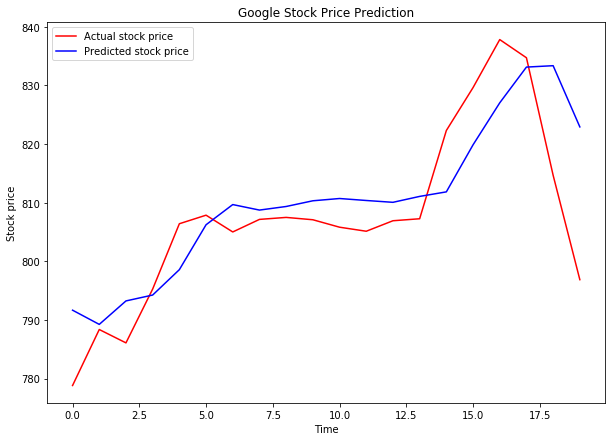

In [0]:
plt.figure(figsize=(10,7))
plt.plot(actual_stock_price,color='red',label='Actual stock price')
plt.plot(predicted_stock_price,color='blue',label='Predicted stock price')
plt.legend()
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock price')
plt.show()